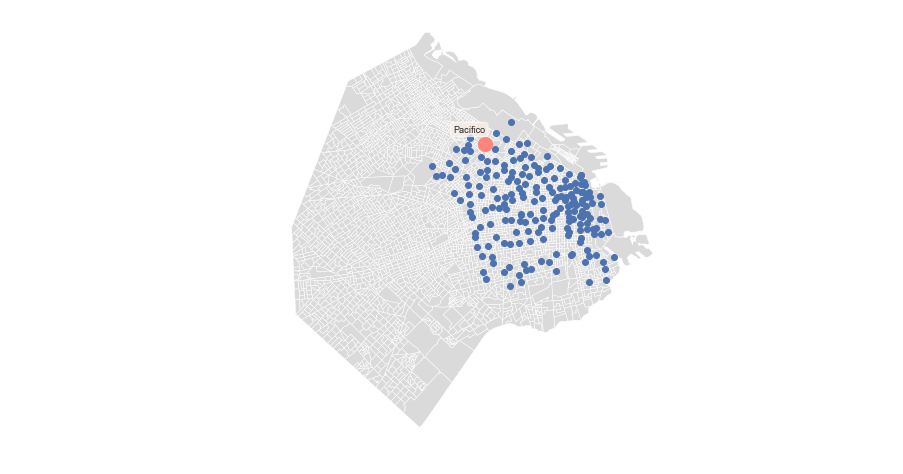

In [109]:
# radios censales caba
caba = gpd.read_file('data/informacion_censal_por_radio_2010.shp')

# ploteamos la estacion Pacifico
f, ax = plt.subplots(1,figsize=(15,8))

caba.plot(ax=ax, linewidth=0.5, color='#dadada')
estaciones.to_crs(crs=caba.crs).plot(ax=ax,marker='o')
pacifico = estaciones.loc[estaciones['NOMBRE']=='Pacífico'] 
pacifico.to_crs(crs=caba.crs).plot(ax=ax,marker='o', color='#FF847C', markersize=200)


props = dict(boxstyle='round', facecolor='linen', alpha=0.7)
for point in pacifico.to_crs(crs=caba.crs).iterrows():
    ax.text(point[1]['geometry'].centroid.x+20,
            point[1]['geometry'].centroid.y+600,
            point[1]['NOMBRE'],
            horizontalalignment='right',
            fontsize=9,
            bbox=props)    
    
    
plt.axis('equal')
ax.set_axis_off()

In [50]:
# ploteamos la estacion sobre un mapa dinamico
f, ax = plt.subplots(1,figsize=(8,8))

estaciones.plot(ax=ax,marker='o')
pacifico = estaciones.loc[estaciones['NOMBRE']=='Pacífico'] 
pacifico.plot(ax=ax,marker='o', color='#FF847C', markersize=200)

mplleaflet.display(fig=ax.figure, crs=pacifico.crs)

In [92]:
# crear el mapa
folium_caba = folium.Map(location=[-34.6004687,-58.4009038],
                         zoom_start=12,
                         tiles="CartoDB dark_matter",
                         width='100%')

# aplica la funcion "add_alpha"
map_overlay = add_alpha(to_image(image_data*10))

# compute extent of image in lat/lon
aspect_ratio = map_overlay.shape[1]/map_overlay.shape[0]
delta_lat = (max_lon-min_lon)/aspect_ratio*np.cos(min_lat/360*2*np.pi)

# crea la imagen
img = folium.raster_layers.ImageOverlay(map_overlay,
                           bounds = [(max_lat-delta_lat,min_lon),(max_lat,max_lon)],
                           opacity = 1,
                           name = "Paths")

# agrega la imagen al mapa junto a un selector de capas
img.add_to(folium_caba)
folium.LayerControl().add_to(folium_caba)

# plotear el mapa
folium_caba

In [93]:
# Crear nuevo mapa
folium_caba_beta = folium.Map(location=[-34.6004687,-58.4009038],
                         zoom_start=12,
                         tiles="CartoDB dark_matter",
                         width='100%')

# Lista para definir umbrales para "cantidad de viajes por recorrido unico"
thresholds = [5,15,25]

for i,t in enumerate(thresholds):
    upper = thresholds[i+1] if i<len(thresholds)-1 else None
    image_data = get_image_data(paths, t, upper)
    name = "{} < Num. Trips < {}".format(t,"max" if upper is None else upper)

    map_overlay = add_alpha(to_image(image_data*10))
    delta_lat = (max_lon-min_lon)/map_overlay.shape[1]*map_overlay.shape[0]*np.cos(min_lat/360*2*np.pi)
    img = folium.raster_layers.ImageOverlay(map_overlay,
                               bounds = [(max_lat-delta_lat,min_lon),(max_lat,max_lon)],
                               name = name)

    # agrega imagen al mapa
    img.add_to(folium_caba_beta)

# selector de capas    
lc = folium.LayerControl().add_to(folium_caba_beta)

folium_caba_beta